# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

sns.set(style="whitegrid")

# Import data

In [2]:
train = pd.read_parquet("../data/train.parquet")
test = pd.read_parquet("../data/test.parquet")
campaigns = pd.read_parquet("../data/campaigns_meta.parquet")
categories = pd.read_parquet("../data/categories.parquet")

### Train / test features:
platform_id: id платформы (Android, Ios и т.п.)  
user_id: id Пользователя   
adv_campaign_id: id рекламной компании   
target: клик / не клик  
banner_code: код баннера  
adv_creative_id: индификатор креатива  
event_date: date Дата показа рекламной кампании пользователю  
is_main: boolean True - показ рекламы был осуществлен с главной страницы  

### Categories features:
microcat_id: id микрокатегории   
level_id: id уровня в дереве микрокатегорий   
parent_microcat_id: id родительской микрокатегории  
logcat_id: id логической категории   
vertical_id: id вертикали   
category_id: id категории   

### Campaigns features:
adv_campaign_id: id рекламной компании  
start_date: date дата начала рекламной компании  
end_date: date дата завершения рекламной компании   
goal_cost: цена за клик на рекламу  
goal_budget: общий бюджет рекламной компании   
logcat_id: id логической категории товаров из рекламной кампании  
location_ids: id локации, на которую рекламная компания распространяется   


# Первичный анализ данных

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114741035 entries, 0 to 114741034
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   user_id          int64 
 1   adv_campaign_id  int64 
 2   platform_id      int64 
 3   adv_creative_id  int64 
 4   event_date       object
 5   banner_code      int64 
 6   is_main          bool  
 7   target           int32 
dtypes: bool(1), int32(1), int64(5), object(1)
memory usage: 5.7+ GB


In [4]:
print(train.isnull().sum())

user_id            0
adv_campaign_id    0
platform_id        0
adv_creative_id    0
event_date         0
banner_code        0
is_main            0
target             0
dtype: int64


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983287 entries, 0 to 1983286
Data columns (total 7 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   user_id          int64 
 1   adv_campaign_id  int64 
 2   platform_id      int64 
 3   adv_creative_id  int64 
 4   event_date       object
 5   banner_code      int64 
 6   is_main          bool  
dtypes: bool(1), int64(5), object(1)
memory usage: 92.7+ MB


In [6]:
print(test.isnull().sum())

user_id            0
adv_campaign_id    0
platform_id        0
adv_creative_id    0
event_date         0
banner_code        0
is_main            0
dtype: int64


In [7]:
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4031 entries, 0 to 4030
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   adv_campaign_id  4031 non-null   int64  
 1   start_date       4031 non-null   object 
 2   end_date         4031 non-null   object 
 3   goal_cost        4031 non-null   float64
 4   goal_budget      4031 non-null   float64
 5   location_id      4031 non-null   int64  
 6   logcat_id        4031 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 220.6+ KB


In [8]:
print(campaigns.isnull().sum())

adv_campaign_id    0
start_date         0
end_date           0
goal_cost          0
goal_budget        0
location_id        0
logcat_id          0
dtype: int64


In [9]:
categories.info()  # видим что здесь почему-то тип float64 у большинства столбцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25891 entries, 0 to 25890
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   microcat_id         25891 non-null  int64  
 1   level_id            25890 non-null  float64
 2   parent_microcat_id  25888 non-null  float64
 3   logcat_id           25883 non-null  float64
 4   vertical_id         25883 non-null  float64
 5   category_id         25887 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.2 MB


In [10]:
print(categories.isnull().sum())  # Количество пропусков по столбцам

microcat_id           0
level_id              1
parent_microcat_id    3
logcat_id             8
vertical_id           8
category_id           4
dtype: int64


Понимаем, что float возникает из-за пропусков в данных, поэтому пока удаляем их. В будущем можно добавить фичей с информацией о пропусках

# Предобработка данных

In [11]:
categories = categories.dropna(how='any')

In [12]:
categories.head(10)

,microcat_id,level_id,parent_microcat_id,logcat_id,vertical_id,category_id
0,33482,7.0,40172.0,54.0,3.0,3.0
1,27254,5.0,48637.0,55.0,5.0,4.0
2,37005,6.0,15332.0,54.0,3.0,3.0
3,31376,8.0,28137.0,58.0,8.0,4.0
4,20493,4.0,18343.0,24.0,8.0,9.0
5,38764,6.0,34243.0,54.0,3.0,3.0
6,43721,5.0,39858.0,55.0,5.0,4.0
7,2437,6.0,4381.0,54.0,3.0,3.0
8,21907,5.0,38183.0,55.0,5.0,4.0
9,11853,8.0,21900.0,58.0,8.0,4.0


In [13]:
categories['level_id'] = categories['level_id'].astype('int')
categories['parent_microcat_id'] = categories['parent_microcat_id'].astype('int')
categories['logcat_id'] = categories['logcat_id'].astype('int')
categories['vertical_id'] = categories['vertical_id'].astype('int')
categories['category_id'] = categories['category_id'].astype('int')

In [14]:
def reduce_mem_usage(df):
    """
    Уменьшает размер датафрейма за счёт оптимизации типов для int и float столбцов
    :param df: входной датафрейм
    :return df: оптимизированный датафрейм
    """
    for col in df.columns:
        col_type = df[col].dtype.name

        if col_type not in ['object', 'category', 'datetime64[ns, UTC]', 'datetime64[ns]', 'bool']:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    return df


In [15]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)
campaigns = reduce_mem_usage(campaigns)
categories = reduce_mem_usage(categories)


In [16]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25879 entries, 0 to 25890
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   microcat_id         25879 non-null  int32
 1   level_id            25879 non-null  int8 
 2   parent_microcat_id  25879 non-null  int32
 3   logcat_id           25879 non-null  int8 
 4   vertical_id         25879 non-null  int8 
 5   category_id         25879 non-null  int8 
dtypes: int32(2), int8(4)
memory usage: 505.4 KB


In [17]:
train.sample(10)

,user_id,adv_campaign_id,platform_id,adv_creative_id,event_date,banner_code,is_main,target
64116786,2822993,4184,3,2526,2024-09-14,6,True,0
87207749,955834,2045,3,776,2024-09-05,6,True,0
67039108,3066617,4102,3,1218,2024-09-20,6,True,0
8805362,1251657,319,3,4125,2024-09-18,6,True,0
83489384,760130,194,2,3057,2024-09-15,8,True,0
29596931,776164,2730,2,57,2024-09-19,8,True,0
87817990,2415309,358,3,3353,2024-09-05,6,True,0
49591032,2506268,664,3,3235,2024-09-22,6,True,0
62487641,2322020,2477,2,55,2024-09-14,8,True,0
88681210,527355,862,2,1889,2024-09-05,8,True,0


In [18]:
train.shape

(114741035, 8)

In [19]:
test.shape

(1983287, 7)

In [20]:
campaigns.sample(10)

/home/odobeskurs/ml_system_design_itmo/.venv/lib/python3.10/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,adv_campaign_id,start_date,end_date,goal_cost,goal_budget,location_id,logcat_id
3237,1956,2024-09-18,2024-09-25,2.728516,64.120377,64,50
3649,623,2024-09-16,2024-09-25,2.673828,2324.100830,51,65
3964,655,2024-08-31,2024-09-14,6.417969,6667.621582,46,2
1595,248,2024-09-19,2024-09-25,4.730469,1648.528809,46,2
1718,2981,2024-09-17,2024-09-23,5.218750,5827.910156,31,51
621,1640,2024-09-12,2024-10-11,9.062500,56848.207031,30,11
517,2507,2024-08-27,2024-09-02,4.218750,3723.837158,46,50
2312,1546,2024-09-16,2024-09-22,6.355469,1274.291260,44,56
3998,2318,2024-09-09,2024-09-15,7.804688,550.095520,45,37
3760,3067,2024-09-19,2024-09-25,3.697266,408.976440,58,39


In [21]:
campaigns.shape

(4031, 7)

In [22]:
categories.sample(10)

,microcat_id,level_id,parent_microcat_id,logcat_id,vertical_id,category_id
7195,1394,5,48794,55,5,4
11281,19460,6,35617,18,5,4
7539,26659,5,18439,55,5,4
8922,17119,6,8933,37,5,4
20013,24827,7,35703,18,5,4
1961,18488,5,22749,55,5,4
7118,18191,5,2186,55,5,4
12699,2526,7,20778,12,3,3
14084,19500,7,44934,12,3,3
9974,3328,6,19434,37,5,4


In [23]:
categories.shape

(25879, 6)

# Анализ данных

In [24]:
# Распределение целевой переменной
print("Процент кликов:", (train['target'].mean() * 100).round(2), "%")

Процент кликов: 0.54 %


Процент кликов очень низкий, метки классов сильно несбалансированы. К сожалению, нет дополнительной информации о взаимодействии пользователя с рекламой, поэтому не получится сделать композитный таргет из разных типов взаимодействий.  
Можно рассматривать задачу как классификацию, так и как ранжирование, как в классической рекомендательной системе. Пока я склоняюсь ко второму варианту, так как сложно будет обучать бинарную классификацию с таким дисбалансом.

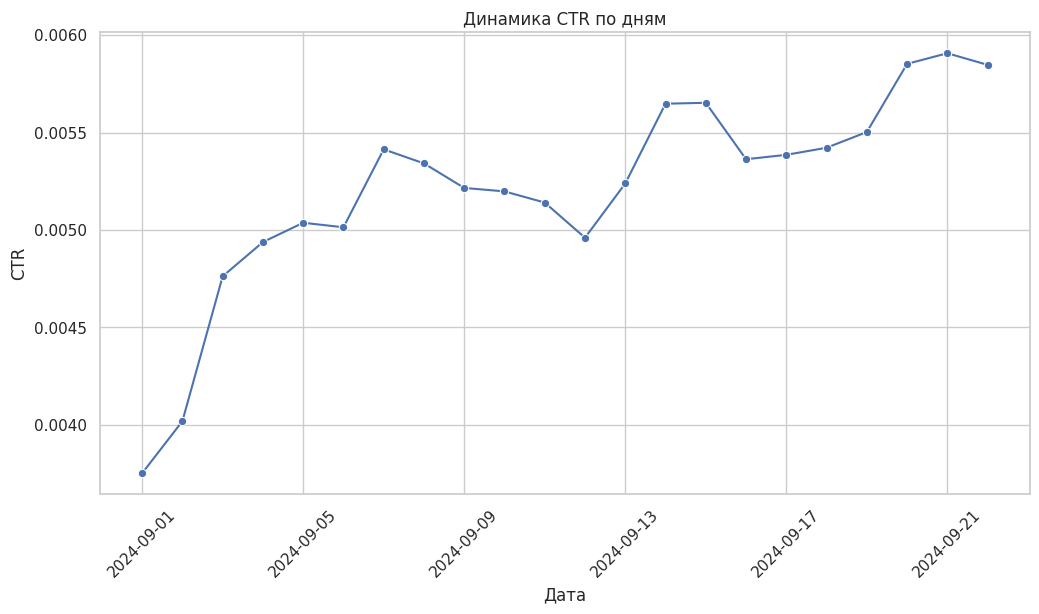

In [39]:
# Конвертируем даты
train['event_date'] = pd.to_datetime(train['event_date'])
campaigns['start_date'] = pd.to_datetime(campaigns['start_date'])
campaigns['end_date'] = pd.to_datetime(campaigns['end_date'])

# Анализ по дням
daily_clicks = train.groupby('event_date')['target'].agg(['count', 'mean']).reset_index()

# Визуализация с помощью Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_clicks, x='event_date', y='mean', marker='o')
plt.title('Динамика CTR по дням')
plt.xlabel('Дата')
plt.ylabel('CTR')
plt.xticks(rotation=45)
plt.show()

Видим, что данные у нас только за 21 день, и на протяжении всего сентября CTR растёт с некоторой сезонностью в течение недели. Пики отражают выходные дни. При этом видим аномально низкое значение 1 сентября. Обязательно нужно добавить фичи, которые отражают дни недели и праздники.

/tmp/ipykernel_4229/326179321.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=platform_stats, x='platform_id', y='mean', palette='viridis')


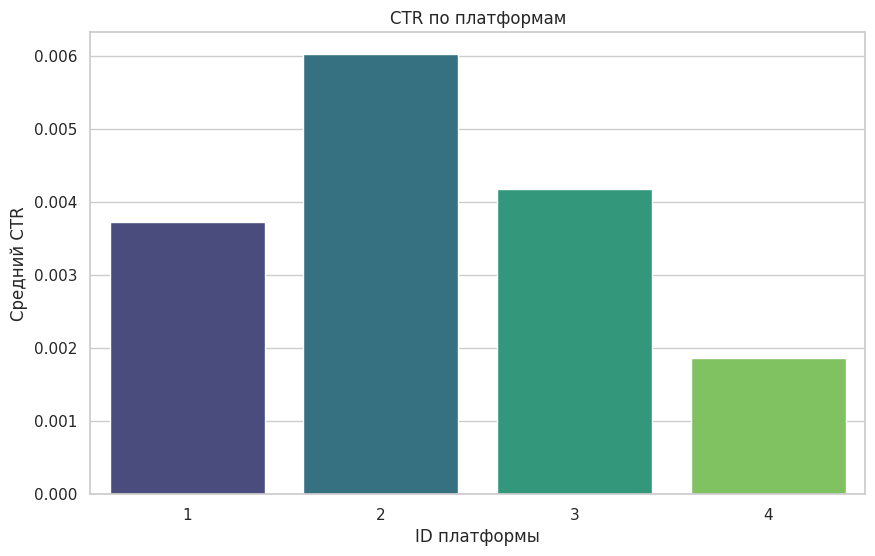

In [40]:
# CTR по платформам

platform_stats = train.groupby('platform_id')['target'].agg(['count', 'mean']).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=platform_stats, x='platform_id', y='mean', palette='viridis')
plt.title('CTR по платформам')
plt.xlabel('ID платформы')
plt.ylabel('Средний CTR')
plt.show()

Данные анонимизированы, но мы видим, что платформа 2 имеет самый высокий CTR, а платформа 4 - самый низкий

In [27]:
# Объединим данные о кампаниях с основным датасетом
campaign_performance = train.merge(campaigns, on='adv_campaign_id', how='left')

In [33]:
campaign_performance.shape

(114741035, 14)

In [30]:
campaign_performance_sample = campaign_performance.sample(1000000)

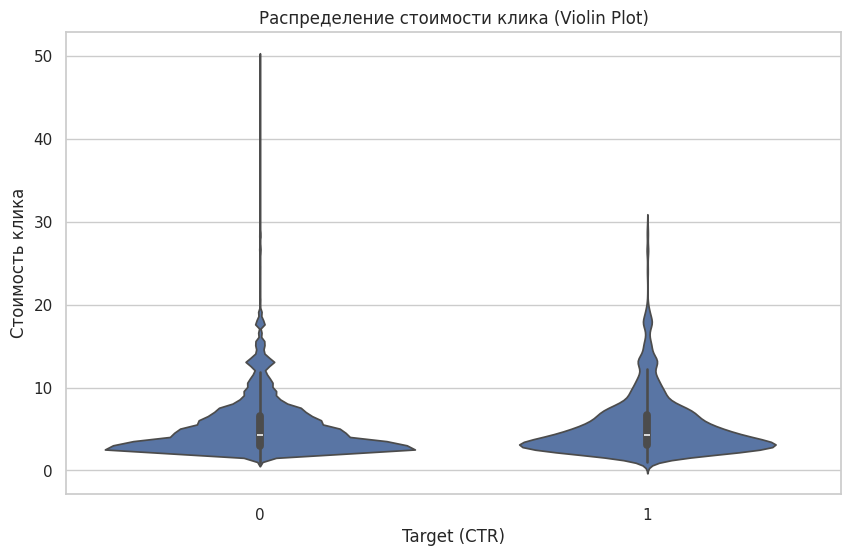

In [38]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=campaign_performance_sample, x='target', y='goal_cost')
plt.title('Распределение стоимости клика (Violin Plot)')
plt.xlabel('Target (CTR)')
plt.ylabel('Стоимость клика')
plt.show()

видим, что в целом распределения для целевой переменной 0 и 1 очень похожи. Очень высокая стоимость клика (больше 30) наблюдается для таргета 0, что может свидетельствовать о том, что дорогая реклама может быть не самой качественной. У нас нет данных о том, что именно содержится в рекламных кампаниях, но если бы были - это обязательно надо было бы проанализировать.

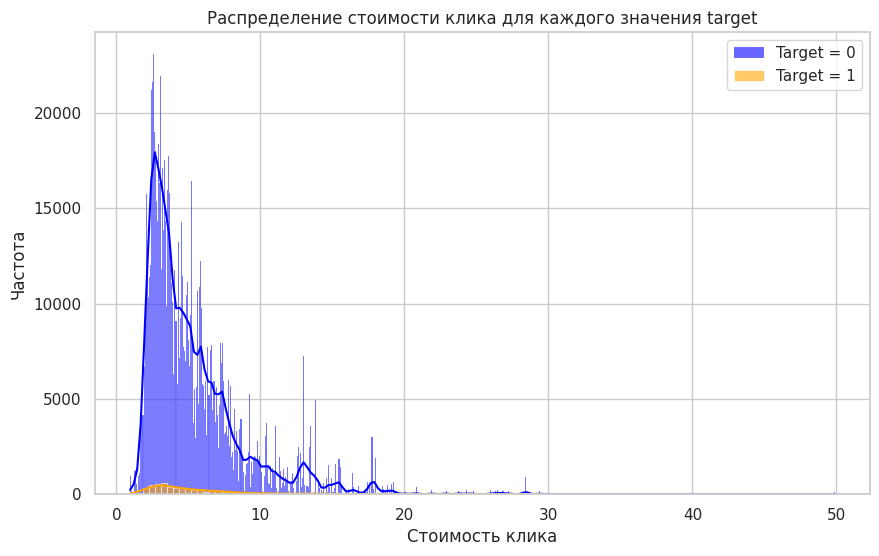

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data=campaign_performance_sample[campaign_performance_sample['target'] == 0], 
             x='goal_cost', color='blue', label='Target = 0', kde=True, alpha=0.6)
sns.histplot(data=campaign_performance_sample[campaign_performance_sample['target'] == 1], 
             x='goal_cost', color='orange', label='Target = 1', kde=True, alpha=0.6)
plt.title('Распределение стоимости клика для каждого значения target')
plt.xlabel('Стоимость клика')
plt.ylabel('Частота')
plt.legend()
plt.show()


In [45]:
# Top-50 кампаний по CTR (минимум 100 показов)
top_campaigns = train.groupby('adv_campaign_id')\
    .agg({'target': ['count', 'mean']})\
    .reset_index()
top_campaigns.columns = ['adv_campaign_id', 'impressions', 'ctr']
top_campaigns = top_campaigns[top_campaigns['impressions'] >= 100]\
    .sort_values('ctr', ascending=False)\
    .head(50)
print("\nТоп-10 кампаний по CTR:")
print(top_campaigns)


Топ-10 кампаний по CTR:
      adv_campaign_id  impressions       ctr
880               914          118  0.076271
1558             1624          121  0.057851
1582             1652          247  0.052632
3819             3981          117  0.051282
528               548         1097  0.048314
495               515          231  0.047619
2979             3106          232  0.047414
2423             2523         1038  0.047206
612               636          111  0.045045
3369             3511         4001  0.043489
1004             1046          207  0.043478
3655             3807          139  0.043165
1140             1186          117  0.042735
2625             2734          120  0.041667
3838             4000          202  0.039604
3770             3931         1071  0.038282
3121             3252         1790  0.037989
2478             2582          133  0.037594
2279             2372          143  0.034965
3890             4053         4451  0.033925
2033             2121         

Impressions (показы) - это количество раз, когда реклама была показана пользователям.

In [42]:
campaign_performance = reduce_mem_usage(campaign_performance)

In [43]:
campaign_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114741035 entries, 0 to 114741034
Data columns (total 14 columns):
 #   Column           Dtype         
---  ------           -----         
 0   user_id          int32         
 1   adv_campaign_id  int16         
 2   platform_id      int8          
 3   adv_creative_id  int16         
 4   event_date       datetime64[ns]
 5   banner_code      int8          
 6   is_main          bool          
 7   target           int8          
 8   start_date       datetime64[ns]
 9   end_date         datetime64[ns]
 10  goal_cost        float16       
 11  goal_budget      float32       
 12  location_id      int8          
 13  logcat_id        int8          
dtypes: bool(1), datetime64[ns](3), float16(1), float32(1), int16(2), int32(1), int8(5)
memory usage: 4.7 GB


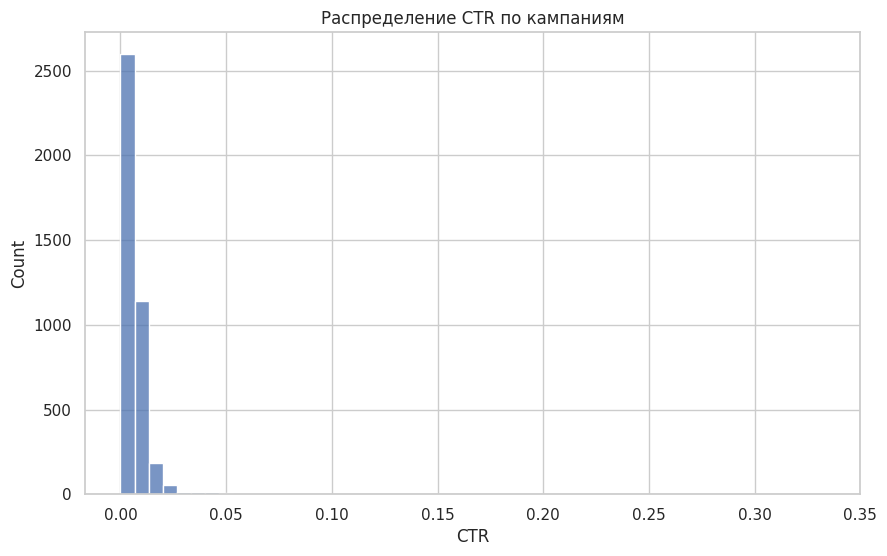

In [47]:
# 1. Анализ рекламных кампаний
campaign_metrics = train.groupby('adv_campaign_id').agg({
    'target': ['count', 'mean'],
    'platform_id': 'nunique',
    'is_main': 'mean'
}).reset_index()
campaign_metrics.columns = ['adv_campaign_id', 'impressions', 'ctr', 'platforms_count', 'main_page_ratio']

# Добавим информацию о бюджетах и целях
campaign_info = campaigns[['adv_campaign_id', 'goal_cost', 'goal_budget', 'logcat_id']]
campaign_analysis = campaign_metrics.merge(campaign_info, on='adv_campaign_id', how='left')

# Визуализация распределения CTR кампаний
plt.figure(figsize=(10, 6))
sns.histplot(data=campaign_analysis, x='ctr', bins=50)
plt.xlabel('CTR')
plt.title('Распределение CTR по кампаниям')
plt.show()

Видим, что у подавляющего большинства кампаний CTR меньше 0.025, что может свидетельствовать о том, что большинство кампаний неэффективны. Скорее всего, пользователи будут кликать в основном на те кампании, которые указаны в ячейке выше. Можно добавить фичу, которая будет отражать этот CTR у кампании.

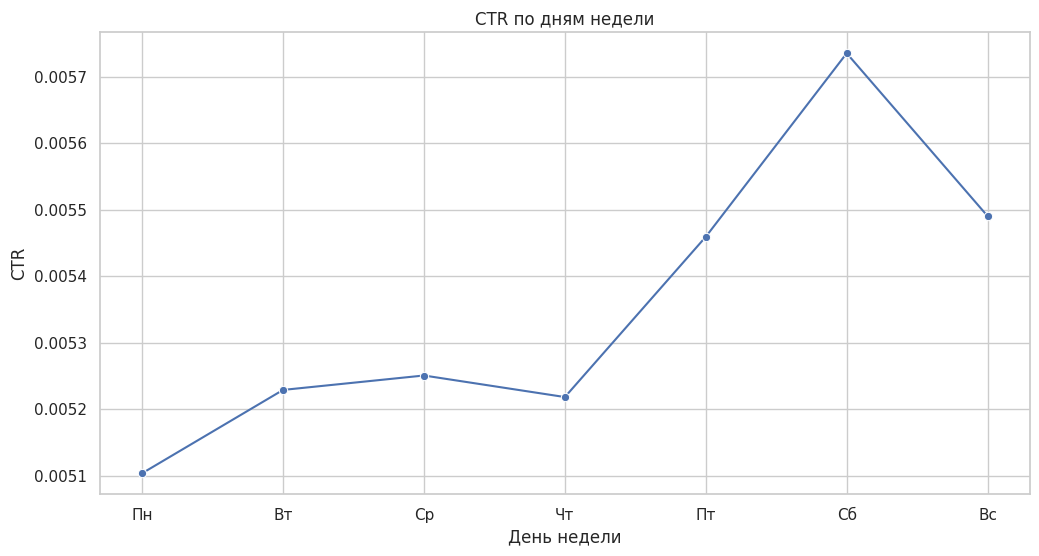

In [50]:
# Конвертируем дату и добавляем день недели
train['event_date'] = pd.to_datetime(train['event_date'])
train['dayofweek'] = train['event_date'].dt.dayofweek

# Группировка и расчет статистики
daily_stats = train.groupby('dayofweek')['target'].agg(['count', 'mean']).reset_index()

# Визуализация с помощью Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_stats, x='dayofweek', y='mean', marker='o')
plt.title('CTR по дням недели')
plt.xlabel('День недели')
plt.ylabel('CTR')
plt.xticks(ticks=range(7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.grid(True)
plt.show()


Здесь убеждаемся, что в выходные CTR выше, чем в рабочие дни

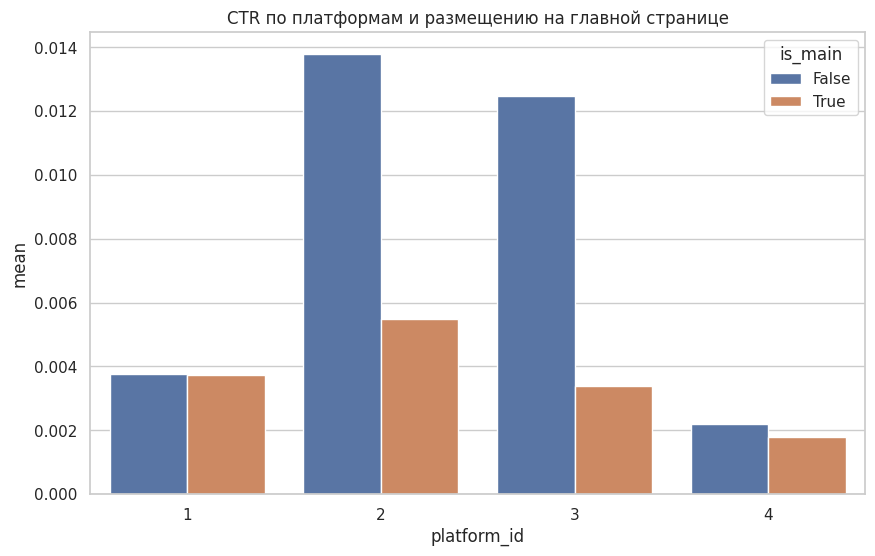

In [51]:
platform_placement = train.groupby(['platform_id', 'is_main'])['target'].agg(['count', 'mean']).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=platform_placement, x='platform_id', y='mean', hue='is_main')
plt.title('CTR по платформам и размещению на главной странице')
plt.show()

Видим, что на платформах 2 и 3 CTR выше не на главной странице. Нужно учитывать эту специфику, что в зависимости от платформы сильно меняется поведение пользователя

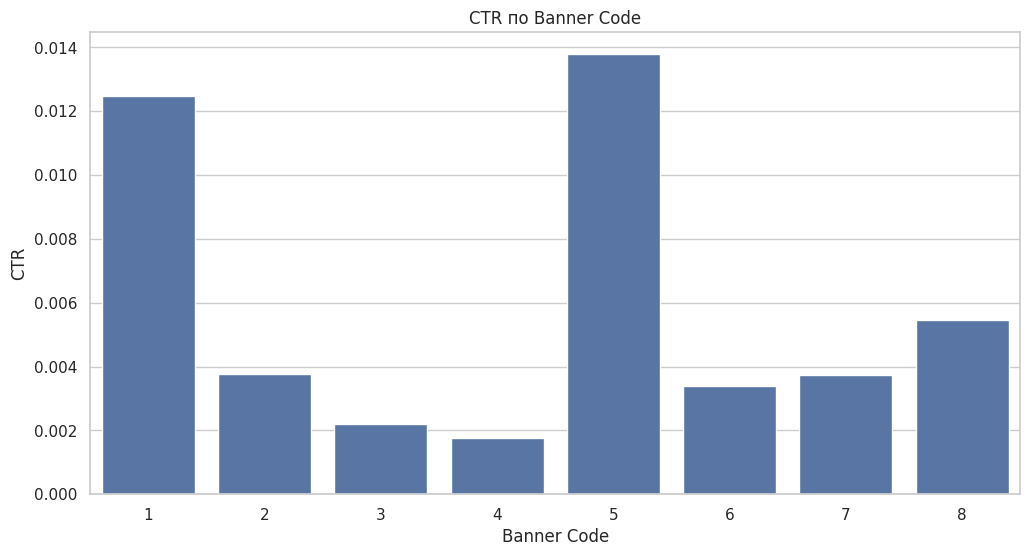

In [61]:
banner_stats = train.groupby('banner_code').agg({
    'target': ['count', 'mean'],
    'platform_id': 'nunique'
}).reset_index()
banner_stats.columns = ['banner_code', 'impressions', 'ctr', 'platforms_used']

top_banners = banner_stats.sort_values('ctr', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_banners, x='banner_code', y='ctr')
plt.xlabel('Banner Code')
plt.ylabel('CTR')
plt.title('CTR по Banner Code')
plt.show()

In [62]:
train['banner_code'].value_counts()

banner_code
8    74296252
6    24006607
5     5302138
7     4622278
4     2892517
1     2297929
3      736431
2      586883
Name: count, dtype: int64

Видим, что banner_code отображает не уникальные баннеры (типа id), а что-то другое, возможно местоположение баннера на страницах. Также это довольно сильно влияет на CTR.

In [63]:
campaigns['start_date'] = pd.to_datetime(campaigns['start_date'])
campaigns['end_date'] = pd.to_datetime(campaigns['end_date'])

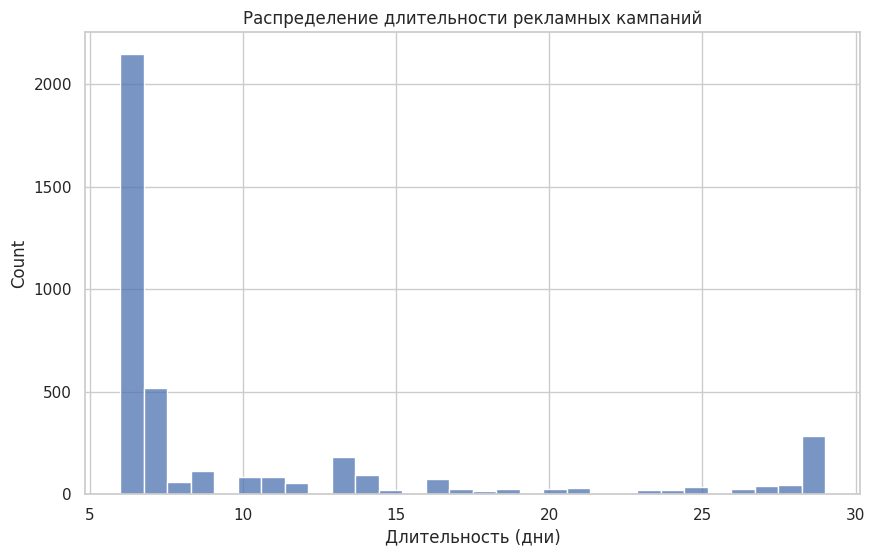

In [64]:
# Анализ длительности кампаний
campaigns['duration'] = (campaigns['end_date'] - campaigns['start_date']).dt.days
plt.figure(figsize=(10, 6))
sns.histplot(data=campaigns, x='duration', bins=30)
plt.title('Распределение длительности рекламных кампаний')
plt.xlabel('Длительность (дни)')
plt.show()

In [66]:
# Статистика по платформам
platform_stats = train.groupby('platform_id').agg({
    'user_id': 'nunique',
    'adv_campaign_id': 'nunique',
    'target': ['count', 'mean']
}).reset_index()
platform_stats.columns = ['platform_id', 'unique_users', 'unique_campaigns', 'impressions', 'ctr']

print("\nСтатистика по платформам:")
print(platform_stats.sort_values('impressions', ascending=False))


Статистика по платформам:
   platform_id  unique_users  unique_campaigns  impressions       ctr
1            2       1955063              4030     79598390  0.006028
2            3       1086555              3849     26304536  0.004186
0            1        186429              3781      5209161  0.003728
3            4        191562              3792      3628948  0.001862


Видим, что платформа 2 имеет наибольшее количество показов и CTR, на втором месте платформа 3

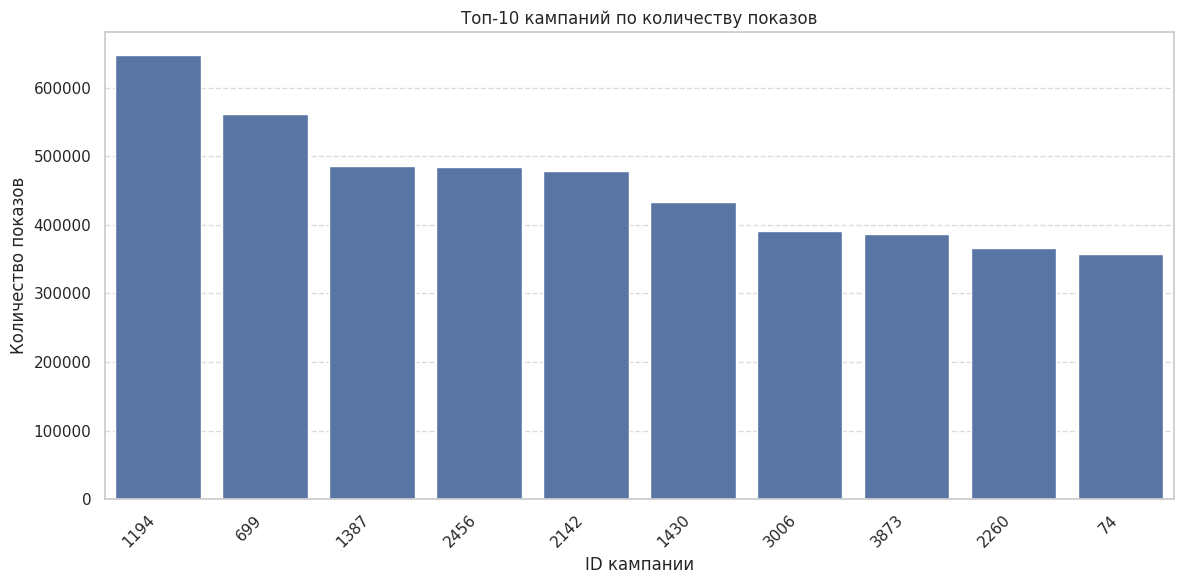

In [73]:
# Топ-10 кампаний по количеству показов (с сортировкой)
campaign_impressions = train.groupby('adv_campaign_id').size().sort_values(ascending=False).head(10).reset_index()
campaign_impressions.columns = ['adv_campaign_id', 'impressions']

# Указание порядка категорий для сортировки
sorted_order = campaign_impressions.sort_values(by='impressions', ascending=False)['adv_campaign_id']

# Визуализация с Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=campaign_impressions, x='adv_campaign_id', y='impressions', order=sorted_order)
plt.title('Топ-10 кампаний по количеству показов')
plt.xlabel('ID кампании')
plt.ylabel('Количество показов')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


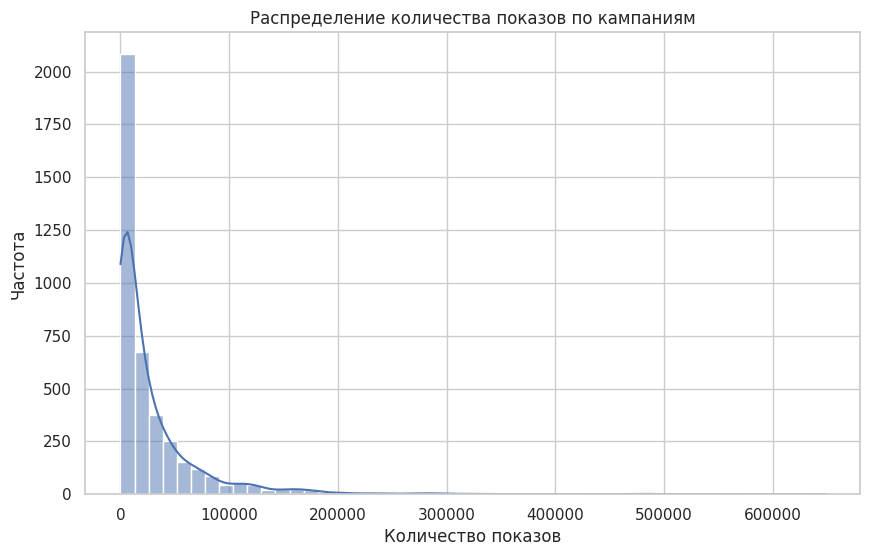

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(train.groupby('adv_campaign_id').size(), bins=50, kde=True)
plt.title("Распределение количества показов по кампаниям")
plt.xlabel("Количество показов")
plt.ylabel("Частота")
plt.show()

In [79]:
duplicate_rows = train.duplicated()
print(f"Количество дублирующихся строк: {duplicate_rows.sum()}")

Количество дублирующихся строк: 0


# Генерация признаков


In [80]:
train

,user_id,adv_campaign_id,platform_id,adv_creative_id,event_date,banner_code,is_main,target,dayofweek
0,2853707,3352,3,3075,2024-09-17,6,True,0,1
1,2537244,4029,2,3260,2024-09-17,8,True,0,1
2,63033,1578,3,1109,2024-09-17,6,True,0,1
3,164702,3434,1,1079,2024-09-17,7,True,0,1
4,2802905,2208,3,3576,2024-09-17,6,True,0,1
...,...,...,...,...,...,...,...,...,...
114741030,2670849,3904,2,3275,2024-09-08,8,True,0,6
114741031,3187004,2142,2,238,2024-09-08,8,True,0,6
114741032,821310,2414,2,2654,2024-09-08,8,True,0,6
114741033,2282258,3120,2,551,2024-09-08,5,False,1,6


In [81]:
train['is_weekend'] = train['dayofweek'].isin([5, 6]).astype(int)

campaigns['campaign_duration'] = (campaigns['end_date'] - campaigns['start_date']).dt.days
train = train.merge(campaigns[['adv_campaign_id', 'end_date']], on='adv_campaign_id', how='left')
train['days_to_campaign_end'] = (train['end_date'] - train['event_date']).dt.days
train['is_campaign_early'] = (train['event_date'] - campaigns['start_date']).dt.days < 3

In [82]:
# Признаки пользователя
user_stats = train.groupby('user_id').agg({
    'target': ['mean', 'count'],  # CTR и количество показов
    'adv_campaign_id': 'nunique'  # Разнообразие кампаний
}).reset_index()
user_stats.columns = ['user_id', 'user_click_rate', 'user_impressions_count', 'user_campaign_diversity']
train = train.merge(user_stats, on='user_id', how='left')

In [83]:
# Признаки рекламной кампании
campaign_stats = train.groupby('adv_campaign_id').agg({
    'target': 'mean',  # CTR
    'event_date': 'count'  # Общее количество показов
}).reset_index()
campaign_stats.columns = ['adv_campaign_id', 'campaign_ctr', 'campaign_impressions']
train = train.merge(campaign_stats, on='adv_campaign_id', how='left')

campaigns['campaign_budget_per_day'] = campaigns['goal_budget'] / campaigns['campaign_duration']
train = train.merge(campaigns[['adv_campaign_id', 'campaign_budget_per_day', 'logcat_id']], on='adv_campaign_id', how='left')

In [84]:
# Признаки креативов
creative_stats = train.groupby('adv_creative_id').agg({
    'target': 'mean',  # CTR
    'event_date': 'count'  # Общее количество показов
}).reset_index()
creative_stats.columns = ['adv_creative_id', 'creative_click_rate', 'creative_impressions']
train = train.merge(creative_stats, on='adv_creative_id', how='left')

In [85]:
# Признаки баннеров
banner_stats = train.groupby('banner_code').agg({
    'target': 'mean',  # CTR
    'event_date': 'count'  # Общее количество показов
}).reset_index()
banner_stats.columns = ['banner_code', 'banner_click_rate', 'banner_impressions']
train = train.merge(banner_stats, on='banner_code', how='left')

In [86]:
# Признаки платформ
platform_stats = train.groupby('platform_id').agg({
    'target': 'mean',  # CTR
}).reset_index()
platform_stats.columns = ['platform_id', 'platform_ctr']
train = train.merge(platform_stats, on='platform_id', how='left')

In [87]:
# Категорийные признаки
category_stats = categories.groupby('logcat_id').agg({
    'microcat_id': 'count',  # Популярность микрокатегории
    'parent_microcat_id': 'nunique'  # Уникальные родительские категории
}).reset_index()
category_stats.columns = ['logcat_id', 'microcat_popularity', 'parent_microcat_count']
train = train.merge(category_stats, on='logcat_id', how='left')

In [88]:
# Признаки взаимодействий
interaction_stats = train.groupby(['user_id', 'adv_campaign_id']).agg({
    'target': 'mean'  # Среднее количество кликов пользователя по кампании
}).reset_index()
interaction_stats.columns = ['user_id', 'adv_campaign_id', 'user_campaign_interaction_rate']
train = train.merge(interaction_stats, on=['user_id', 'adv_campaign_id'], how='left')

In [89]:
train

,user_id,adv_campaign_id,platform_id,adv_creative_id,event_date,banner_code,is_main,target,dayofweek,is_weekend,...,campaign_budget_per_day,logcat_id,creative_click_rate,creative_impressions,banner_click_rate,banner_impressions,platform_ctr,microcat_popularity,parent_microcat_count,user_campaign_interaction_rate
0,2853707,3352,3,3075,2024-09-17,6,True,0,1,0,...,294.199544,56,0.005920,10473,0.003393,24006607,0.004186,398,47,0.0
1,2537244,4029,2,3260,2024-09-17,8,True,0,1,0,...,1158.876872,65,0.004265,66582,0.005474,74296252,0.006028,551,93,0.0
2,63033,1578,3,1109,2024-09-17,6,True,0,1,0,...,502.551723,65,0.005667,72700,0.003393,24006607,0.004186,551,93,0.0
3,164702,3434,1,1079,2024-09-17,7,True,0,1,0,...,719.201869,65,0.006478,27476,0.003723,4622278,0.003728,551,93,0.0
4,2802905,2208,3,3576,2024-09-17,6,True,0,1,0,...,1170.787516,65,0.004361,62141,0.003393,24006607,0.004186,551,93,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114741030,2670849,3904,2,3275,2024-09-08,8,True,0,6,1,...,2122.917188,56,0.006075,88400,0.005474,74296252,0.006028,398,47,0.0
114741031,3187004,2142,2,238,2024-09-08,8,True,0,6,1,...,5334.663462,26,0.007666,479253,0.005474,74296252,0.006028,525,52,0.0
114741032,821310,2414,2,2654,2024-09-08,8,True,0,6,1,...,528.210554,40,0.004826,156457,0.005474,74296252,0.006028,671,136,0.0
114741033,2282258,3120,2,551,2024-09-08,5,False,1,6,1,...,305.144409,64,0.004127,74390,0.013788,5302138,0.006028,58,6,1.0
